In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read data
df = pd.read_csv("Symptom-Disease.csv")
df.drop("Unnamed: 0",inplace=True,axis=1)

In [3]:
df

label                                               text
0     Psoriasis  I have been experiencing a skin rash on my arm...
1     Psoriasis  My skin has been peeling, especially on my kne...
2     Psoriasis  I have been experiencing joint pain in my fing...
3     Psoriasis  There is a silver like dusting on my skin, esp...
4     Psoriasis  My nails have small dents or pits in them, and...
...         ...                                                ...
1195   diabetes  I'm shaking and trembling all over. I've lost ...
1196   diabetes  Particularly in the crevices of my skin, I hav...
1197   diabetes  I regularly experience these intense urges and...
1198   diabetes  I have trouble breathing, especially outside. ...
1199   diabetes  I constantly sneeze and have a dry cough. My i...

[1200 rows x 2 columns]

In [4]:
df.head(10)

label                                               text
0  Psoriasis  I have been experiencing a skin rash on my arm...
1  Psoriasis  My skin has been peeling, especially on my kne...
2  Psoriasis  I have been experiencing joint pain in my fing...
3  Psoriasis  There is a silver like dusting on my skin, esp...
4  Psoriasis  My nails have small dents or pits in them, and...
5  Psoriasis  The skin on my palms and soles is thickened an...
6  Psoriasis  The skin around my mouth, nose, and eyes is re...
7  Psoriasis  My skin is very sensitive and reacts easily to...
8  Psoriasis  I have noticed a sudden peeling of skin at dif...
9  Psoriasis  The skin on my genitals is red and inflamed. I...

## Get to know about data.

In [5]:
df.shape

(1200, 2)

In [6]:
df.describe()

label                                               text
count        1200                                               1200
unique         24                                               1153
top     Psoriasis  I've been feeling extremely scratchy, sick, an...
freq           50                                                  4

In [7]:
df["label"].describe()

count          1200
unique           24
top       Psoriasis
freq             50
Name: label, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [9]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [10]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [label, text]
Index: []

In [11]:
for col in df.columns:
    print(col,": ",df[col].unique(),"\n")

label :  ['Psoriasis' 'Varicose Veins' 'Typhoid' 'Chicken pox' 'Impetigo' 'Dengue'
 'Fungal infection' 'Common Cold' 'Pneumonia' 'Dimorphic Hemorrhoids'
 'Arthritis' 'Acne' 'Bronchial Asthma' 'Hypertension' 'Migraine'
 'Cervical spondylosis' 'Jaundice' 'Malaria' 'urinary tract infection'
 'allergy' 'gastroesophageal reflux disease' 'drug reaction'
 'peptic ulcer disease' 'diabetes'] 

text :  ['I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.'
 'My skin has been peeling, especially on my knees, elbows, and scalp. This peeling is often accompanied by a burning or stinging sensation.'
 'I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints.'
 ...
 "I regularly experience these intense urges and the want to urinate. I frequently feel drowsy and lost. I've also significantly lost my vision."
 'I have troub

## Lets clean data

In [12]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
#set of English stop words
stop_words = set(stopwords.words('english'))

In [14]:
def clean_text(sent):
    #remove punctuations
    sent = sent.translate(str.maketrans('','',string.punctuation)).strip()

    #remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(sent)
    words = [word for word in words if word not in stop_words]

    return " ".join(words).lower()

In [15]:
# apply clean_text on text column of df
df["text"] = df["text"].apply(clean_text)

Vizualize text content

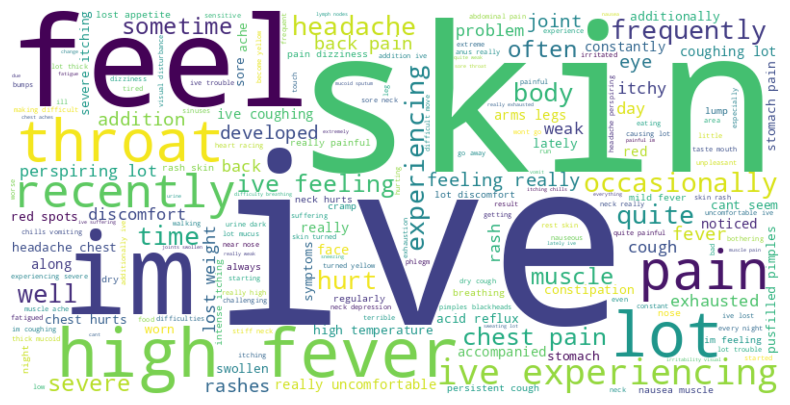

In [16]:
# create word cloud to vizualize frequent words in our dataset
all_text = " ".join(df["text"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


# Plotting Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='hamming')
plt.axis('off')
plt.show()

In [17]:
#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

### Text Vectorization


In [18]:
# use tfidf for text vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1500)

tfidf_train = tfidf_vectorizer.fit_transform(X_train).toarray()
tfidf_test = tfidf_vectorizer.transform(X_test).toarray()

### Model Selection

KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(tfidf_train, y_train)

KNeighborsClassifier()

In [20]:
predictions = knn.predict(tfidf_test)

In [21]:
def report(y_test,predictions):
    """Function to create classification report"""
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, predictions))

In [22]:
report(y_test,predictions)

Accuracy: 0.97
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       0.92      1.00      0.96        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.85      0.92      0.88        12
                    Common Cold       1.00      0.92      0.96        12
                         Dengue       0.79      0.92      0.85        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
                        Malaria    

In [23]:
def make_pred(model,text):
    """Function to make prediction on single data instance"""
    text = clean_text(text)
    tfidf = tfidf_vectorizer.transform([text]).toarray()
    disease = model.predict(tfidf)

    return disease[0]

testing the model on some real data examples that are input by us

In [24]:
symp1 = "Yellowing of skin and eyes, fatigue"
make_pred(knn,symp1)

'Jaundice'

In [25]:
symp2 = "I noticed a sudden onset of high fever, along with a rash on my skin and severe pain behind my eyes."
make_pred(knn, symp2)

'Dengue'

In [26]:
# some custom symptoms generated by Chat GPT
cust_symptoms = {
    #'Arthritis': ["I have joint pain, stiffness, and swelling.", "My joints are often red and warm to the touch."],
    # 'Acne': ["I'm getting frequent pimples, blackheads, and whiteheads.", "Sometimes I get big, red zits that hurt, and my skin is oily and easily irritated."],
    # 'Bronchial Asthma': ["I've been wheezing, coughing, and experiencing shortness of breath.", "My chest feels tight and I have difficulty breathing."],
    # 'Hypertension': ["I have high blood pressure, with no noticeable symptoms.", "Sometimes I get headaches and experience nosebleeds."],
    # 'Migraine': ["I have severe, throbbing headaches, often on one side of my head.", "I'm sensitive to light, sound, and sometimes experience nausea and vomiting."],
    # 'Cervical spondylosis': ["I have neck pain and stiffness, which can radiate to my shoulders and arms.", "I may also experience numbness or weakness in my extremities."],
    # 'Jaundice': ["I have yellowing of the skin and eyes.", "I've experienced fatigue, dark urine, and pale-colored stools."],
    'Fungal Infection': ["I have itchy, red patches of skin that may crack or peel.", "My skin feels moist and develops a rash, especially in warm and humid areas."],
    'Impetigo': ["I notice small, red sores or blisters that quickly burst and ooze fluid.", "The sores form a honey-colored crust and may be itchy or painful."],
    'Varicose Veins': ["I have bulging, twisted veins that are visible just beneath the skin's surface.", "My legs feel heavy or achy, especially after standing for long periods."],
    'Acne': ["I develop pimples, blackheads, and whiteheads on my face, neck, chest, or back.", "My skin may be oily and prone to inflammation, leading to redness and swelling."],
}


In [27]:
def custom_test(model):
    c = 0
    correct_count = 0
    for dis,symptoms in cust_symptoms.items():
        for symptom in symptoms:
            c += 1
            pred = make_pred(model,symptom)
            correct = pred.lower()==dis.lower()
            if correct: correct_count += 1
            print("Actual: ",dis,"\t Pred: ",pred,"--",correct)

    print("\nTotal: ",c,"\nCorrect: ",correct_count)

In [28]:
custom_test(knn)

Actual:  Fungal Infection 	 Pred:  Psoriasis -- False
Actual:  Fungal Infection 	 Pred:  Dengue -- False
Actual:  Impetigo 	 Pred:  Impetigo -- True
Actual:  Impetigo 	 Pred:  Impetigo -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Acne 	 Pred:  Acne -- True
Actual:  Acne 	 Pred:  Psoriasis -- False

Total:  8 
Correct:  5


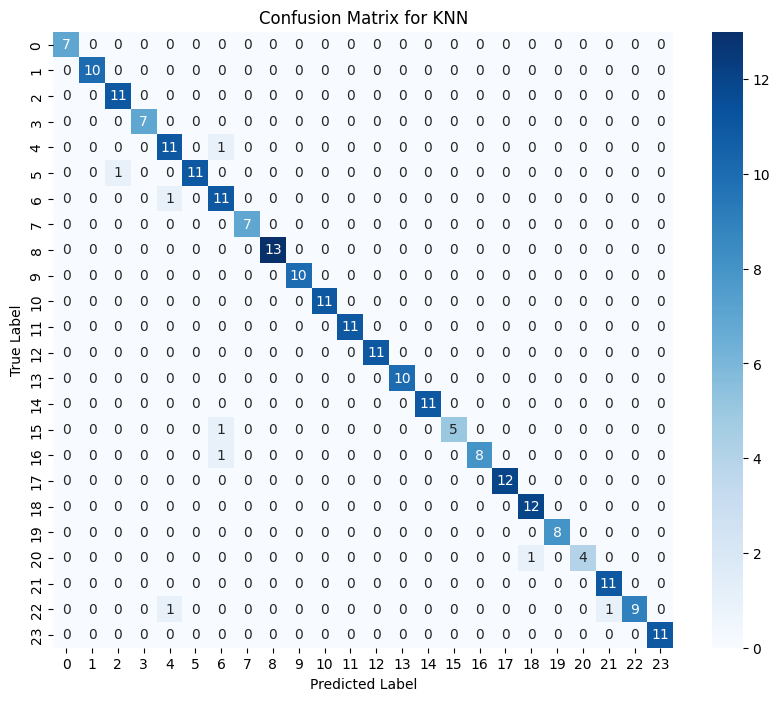

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### SVM

In [30]:
#support vector machine
svm = SVC(kernel = 'linear', C = 1).fit(tfidf_train, y_train)
svm_pred = svm.predict(tfidf_test)

In [31]:
make_pred(svm,symp1)

'allergy'

In [32]:
custom_test(svm)

Actual:  Fungal Infection 	 Pred:  Psoriasis -- False
Actual:  Fungal Infection 	 Pred:  Psoriasis -- False
Actual:  Impetigo 	 Pred:  Impetigo -- True
Actual:  Impetigo 	 Pred:  Impetigo -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Acne 	 Pred:  Acne -- True
Actual:  Acne 	 Pred:  drug reaction -- False

Total:  8 
Correct:  5


In [33]:
Report= classification_report(y_test,svm_pred)
print(Report)

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.92      0.92      0.92        12
                    Common Cold       1.00      1.00      1.00        12
                         Dengue       0.92      0.92      0.92        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
                        Malaria       1.00      1.

In [34]:
make_pred(svm,symp1)

'allergy'

In [35]:
custom_test(svm)

Actual:  Fungal Infection 	 Pred:  Psoriasis -- False
Actual:  Fungal Infection 	 Pred:  Psoriasis -- False
Actual:  Impetigo 	 Pred:  Impetigo -- True
Actual:  Impetigo 	 Pred:  Impetigo -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Acne 	 Pred:  Acne -- True
Actual:  Acne 	 Pred:  drug reaction -- False

Total:  8 
Correct:  5


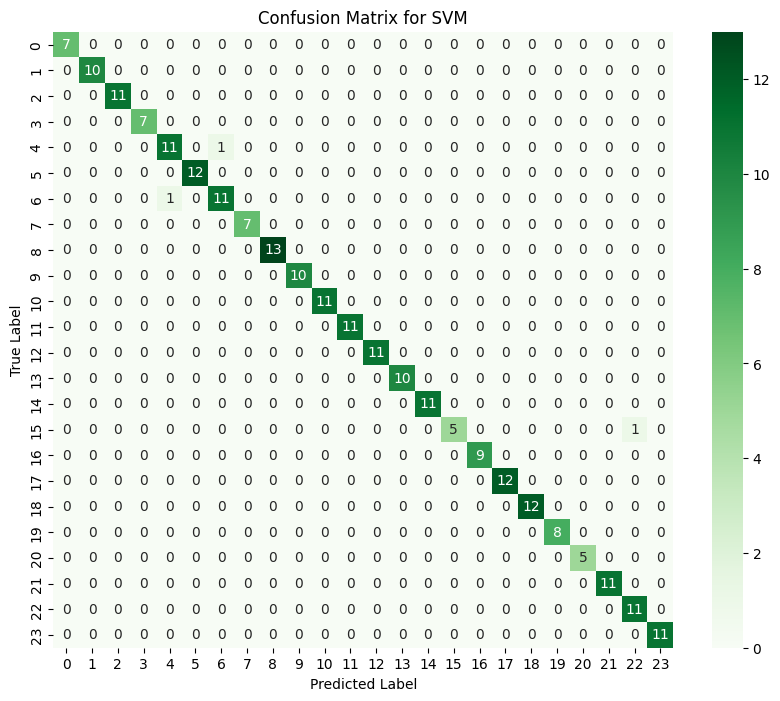

In [36]:

# Plot Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Random Forest

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(tfidf_train, y_train)
rf_pred = rf.predict(tfidf_test)


In [38]:
make_pred(rf,symp1)
custom_test(rf)

Actual:  Fungal Infection 	 Pred:  Psoriasis -- False
Actual:  Fungal Infection 	 Pred:  Psoriasis -- False
Actual:  Impetigo 	 Pred:  Impetigo -- True
Actual:  Impetigo 	 Pred:  Impetigo -- True
Actual:  Varicose Veins 	 Pred:  drug reaction -- False
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Acne 	 Pred:  Acne -- True
Actual:  Acne 	 Pred:  Psoriasis -- False

Total:  8 
Correct:  4


In [39]:
report = classification_report(y_test, rf_pred)
print(report)

                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.83      0.83      0.83        12
                    Common Cold       1.00      1.00      1.00        12
                         Dengue       0.91      0.83      0.87        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       1.00      1.00      1.00        13
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        11
                       Jaundice       1.00      1.00      1.00        11
                        Malaria       1.00      1.

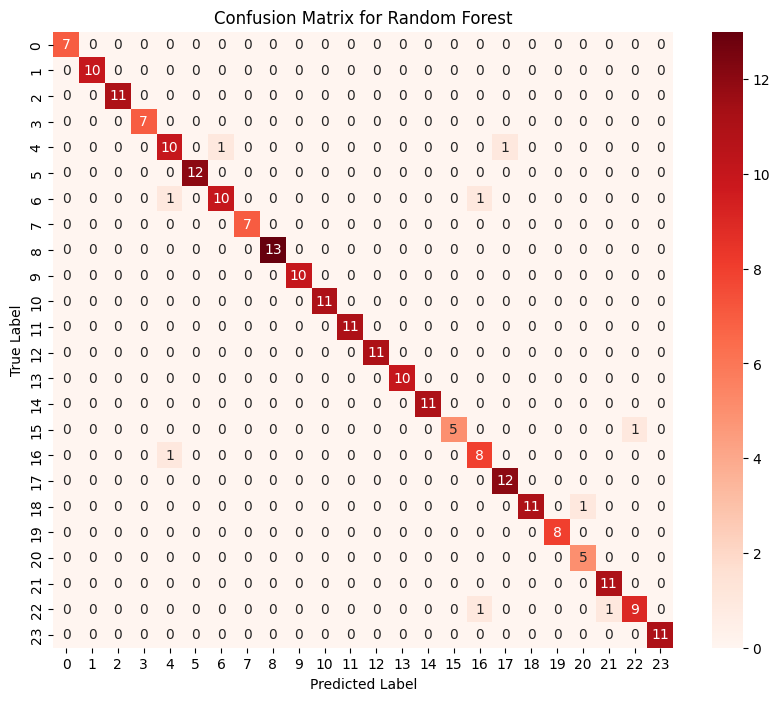

In [40]:
# Plot Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(tfidf_train, y_train)
predictions_dtc = dtc.predict(tfidf_test)
import matplotlib.pyplot as plt


In [42]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(200,100))
tree.plot_tree(dtc, feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=df['label'].unique(), fontsize=10, filled=True)
plt.show()


In [43]:
# Evaluate the performance of the model
accuracy_dtc = accuracy_score(y_test, predictions_dtc)
print(f'Accuracy: {accuracy_dtc:.2f}')
print(classification_report(y_test, predictions_dtc))

Accuracy: 0.80
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      0.82      0.90        11
           Cervical spondylosis       0.86      0.86      0.86         7
                    Chicken pox       0.45      0.42      0.43        12
                    Common Cold       0.70      0.58      0.64        12
                         Dengue       0.60      0.50      0.55        12
          Dimorphic Hemorrhoids       1.00      1.00      1.00         7
               Fungal infection       0.87      1.00      0.93        13
                   Hypertension       1.00      0.60      0.75        10
                       Impetigo       0.91      0.91      0.91        11
                       Jaundice       1.00      1.00      1.00        11
                        Malaria    

In [44]:
# Make a prediction on a single data instance
def make_pred_dtc(model, text):
    text = clean_text(text)
    tfidf = tfidf_vectorizer.transform([text]).toarray()
    disease = model.predict(tfidf)
    return disease[0]


In [45]:
symp1 = "Yellowing of skin and eyes, fatigue"
print(make_pred_dtc(dtc, symp1))

Fungal infection


In [46]:
symp2 = "I noticed a sudden onset of high fever, along with a rash on my skin and severe pain behind my eyes."
print(make_pred_dtc(dtc, symp2))

Fungal infection


In [47]:
# Test the model on custom symptoms
custom_test(dtc)

cm_dtc = confusion_matrix(y_test, predictions_dtc)
plt.figure(figsize=(10, 8))

Actual:  Fungal Infection 	 Pred:  Fungal infection -- True
Actual:  Fungal Infection 	 Pred:  Fungal infection -- True
Actual:  Impetigo 	 Pred:  Impetigo -- True
Actual:  Impetigo 	 Pred:  Impetigo -- True
Actual:  Varicose Veins 	 Pred:  drug reaction -- False
Actual:  Varicose Veins 	 Pred:  Varicose Veins -- True
Actual:  Acne 	 Pred:  Acne -- True
Actual:  Acne 	 Pred:  Fungal infection -- False

Total:  8 
Correct:  6


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

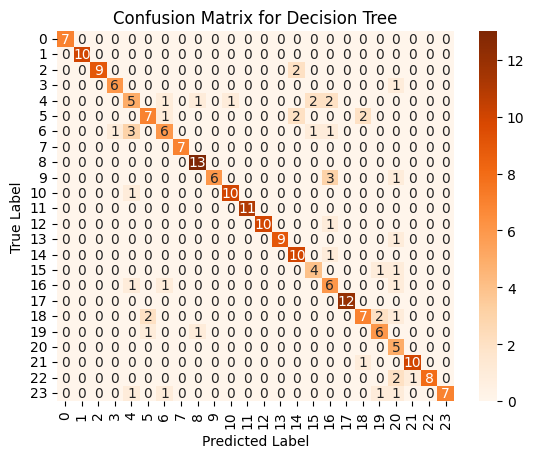

In [48]:
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [49]:


print("KNN Accuracy:", accuracy_score(y_test, predictions) * 100, "%")
print("SVM Accuracy:", accuracy_score(y_test, svm_pred) * 100, "%")
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred) * 100, "%")
print("Decision Tree Accuracy:", accuracy_score(y_test, predictions_dtc) * 100, "%")


KNN Accuracy: 96.66666666666667 %
SVM Accuracy: 98.75 %
Random Forest Accuracy: 96.25 %
Decision Tree Accuracy: 79.58333333333333 %


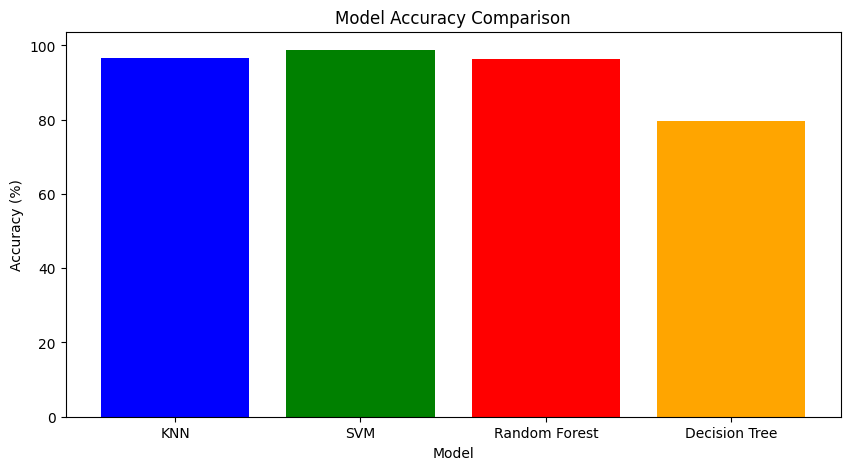

In [50]:
import matplotlib.pyplot as plt


models = ['KNN', 'SVM', 'Random Forest', 'Decision Tree']
accuracies = [accuracy_score(y_test, predictions) * 100,
              accuracy_score(y_test, svm_pred) * 100,
              accuracy_score(y_test, rf_pred) * 100,
              accuracy_score(y_test, predictions_dtc) * 100]

colors = ['blue', 'green', 'red', 'orange']

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=colors)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.show()
